# Microcenter
## Imports

In [19]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Grab csv files

In [3]:
stores_df_2019 = pd.read_csv('../data/combined_2019_stores.csv')
stores_df_2020 = pd.read_csv('../data/combined_2020.csv')

stores_df_2019.tail(3)

,METRO,migration_net,population,male_20_34_p,enrolled_9_12_p,enrolled_college_p,enrolled_grad_p,occ_com_sci_math_p,occ_eng_p,mult_desktop_laptop_p,inc_50_74,inc_75_99,inc_100_149,inc_150_199,median_income,mean_income,stores
381,"Youngstown-Warren-Boardman, OH-PA Metro Area",-1973,541846,8.99,5.12,4.13,0.71,0.58,0.96,30.08,18.3,11.9,11.8,3.0,47360,64175,0
382,"Yuba City, CA Metro Area",837,172469,11.21,5.75,6.00,0.88,0.37,0.74,25.38,18.1,12.2,16.2,6.1,58551,76413,0
383,"Yuma, AZ Metro Area",786,209468,12.74,6.03,5.16,0.57,0.25,0.67,23.55,18.6,12.0,10.1,3.0,45243,59526,0


In [78]:
micro_metros = stores_df_2019['METRO'].values
micro_targets_2019 = stores_df_2019['stores'].values
print(micro_targets_2019)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [96]:
# Get training values from 2019 by selecting all by first column (metro name)
micro_training_values_2019 = stores_df_2019.iloc[:, 1:]

micro_training_values_2019 = micro_training_values_2019.iloc[:, :-1]

micro_training_values_2019.tail(3)

,migration_net,population,male_20_34_p,enrolled_9_12_p,enrolled_college_p,enrolled_grad_p,occ_com_sci_math_p,occ_eng_p,mult_desktop_laptop_p,inc_50_74,inc_75_99,inc_100_149,inc_150_199,median_income,mean_income
381,-1973,541846,8.99,5.12,4.13,0.71,0.58,0.96,30.08,18.3,11.9,11.8,3.0,47360,64175
382,837,172469,11.21,5.75,6.00,0.88,0.37,0.74,25.38,18.1,12.2,16.2,6.1,58551,76413
383,786,209468,12.74,6.03,5.16,0.57,0.25,0.67,23.55,18.6,12.0,10.1,3.0,45243,59526


In [97]:
# Standardize and scale all the values
X = StandardScaler().fit_transform(micro_training_values_2019)

In [98]:
# Calculate the Kaiser-Meyer-Olkin criterion for items and overall.

# This statistic represents the degree to which each observed variable is predicted, without error, by the other variables in the dataset. In general, a KMO < 0.6 is considered inadequate.

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars, kmo_model = calculate_kmo(X)
print(kmo_vars, kmo_model)

[0.85246624 0.84155474 0.71454736 0.55774896 0.73646084 0.78117795
 0.8581839  0.90662081 0.68132139 0.78588415 0.65855889 0.85220726
 0.88463483 0.77966191 0.82721856] 0.8068663936606472


/Users/michael/opt/anaconda3/envs/py310/lib/python3.10/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [99]:
feature_cols = ['feature'+str(i) for i in range(X.shape[1])]
normal_values = pd.DataFrame(X, columns=feature_cols)
normal_values.head(3)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14
0,0.043466,-0.342856,1.195783,-0.073368,0.144512,-0.268587,-0.805029,-0.794606,-1.050272,0.210229,-0.329191,-0.431073,-0.577702,-0.560423,-0.562554
1,-0.411680,-0.014465,-0.269750,-0.159966,-0.002903,0.391274,0.148203,0.339701,0.702717,-0.235781,0.187972,-0.160153,0.062167,-0.133518,-0.027556
2,-0.305647,-0.370954,-0.489579,-0.145533,-0.761476,-0.330838,-0.622495,-0.442971,0.232332,1.357111,0.779016,-0.160153,-0.774585,-0.257994,-0.574134


## Dimension Reduction using PCA

In [100]:
from sklearn.decomposition import PCA

pca = PCA()
pca_features = pca.fit_transform(X)
pca_features


pc_list = ['PC'+str(i) for i in list(range(1, len(pca_features[0]) + 1))]

pca_df = pd.DataFrame(data=pca_features, columns=pc_list)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.576156,0.691321,0.531358,-0.939486,0.357969,0.184570,-0.738672,0.687587,-0.058270,-0.067036,-0.036392,-0.053907,-0.081602,0.073182,0.032096
1,0.247076,0.269608,-0.467653,0.482213,-0.327279,0.028161,0.458154,-0.284695,-0.149651,-0.281445,-0.110313,-0.072762,0.260663,-0.133432,0.051977
2,-1.511260,-0.817452,-1.325261,-0.008651,0.526745,-0.150122,0.257583,0.050595,0.062210,0.125206,-0.150131,-0.333794,0.078174,0.181144,-0.139543
3,3.075815,-0.242208,-0.694854,0.168696,-0.682405,0.076838,-0.046413,-0.248565,-0.321569,-0.174266,-0.062307,-0.054616,-0.451435,-0.048077,-0.082732
4,-2.929298,0.620301,2.405916,0.012200,-0.599915,-0.408244,0.112033,-0.874885,0.499729,-0.260054,0.526206,0.134663,-0.294931,0.005765,-0.161556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-3.053097,-1.376781,1.062307,-1.558272,0.455901,-0.543699,0.445697,0.022185,0.356572,0.436010,0.069274,-0.284222,0.614771,-0.184424,-0.010411
380,0.415852,-1.865650,-1.719958,-0.660374,0.345116,0.059362,0.149879,-0.003068,0.405228,0.623593,-0.260727,-0.288238,-0.470981,-0.022665,-0.034199
381,-2.388599,-0.136666,0.107491,1.187533,-0.285220,0.009187,0.430100,-0.180368,-0.068687,-0.530078,0.185552,0.079912,-0.026744,0.244638,-0.078595
382,-0.767386,-0.583946,0.859618,-1.303610,-0.528935,0.285325,-0.497540,-0.042412,0.590389,-0.081393,-0.256887,0.074109,-0.612804,0.075418,-0.027956


[0.40673389 0.58479703 0.70783109 0.79713215 0.86024718 0.89953384
 0.92714889 0.94507328 0.95795903 0.97068596 0.98119553 0.99048605
 0.99661037 0.99913725 1.        ]


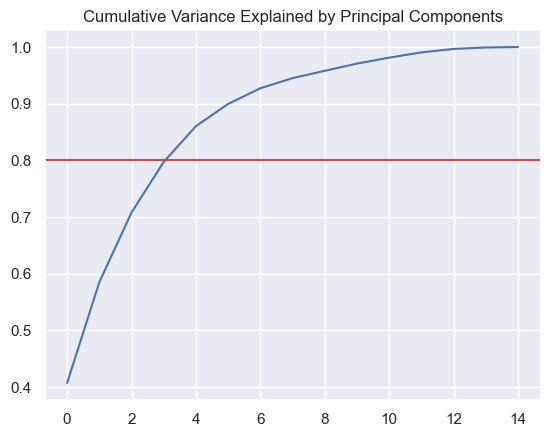

In [101]:
from sklearn.decomposition import PCA

print(np.cumsum(pca.explained_variance_ratio_))

sns.set()

plt.plot(
    np.cumsum(pca.explained_variance_ratio_)
)
plt.axhline(y=0.8, color='r', linestyle='-')

plt.title('Cumulative Variance Explained by Principal Components')

plt.show()

[6.1169378  2.67792095 1.85032944 1.34301326 0.94919732 0.5908386
 0.41530729 0.26956779 0.19379104 0.19140231 0.15805516 0.13972162
 0.09210468 0.03800216 0.01297506]


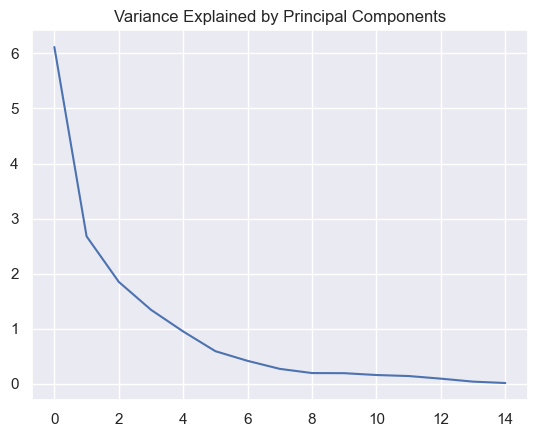

In [102]:
print(pca.explained_variance_)

sns.set()

plt.plot(pca.explained_variance_)


plt.title('Variance Explained by Principal Components')

plt.show()

In [103]:
pcax = PCA(n_components=5)
pcax_features = pcax.fit_transform(X)
pcx_list = ['PC'+str(i) for i in list(range(1, len(pcax_features[0]) + 1))]

pcax_df = pd.DataFrame(data=pcax_features, columns=pcx_list)
pcax_df.head(3)

,PC1,PC2,PC3,PC4,PC5
0,-1.576156,0.691321,0.531358,-0.939486,0.357969
1,0.247076,0.269608,-0.467653,0.482213,-0.327279
2,-1.511260,-0.817452,-1.325261,-0.008651,0.526745


In [104]:
evr = pcax.explained_variance_ratio_
print(f'Explained variaton for each Principal Component', evr)
print(f'Total explained variation: {round(100 * np.sum(evr), 2)}%')

Explained variaton for each Principal Component [0.40673389 0.17806315 0.12303406 0.08930106 0.06311503]
Total explained variation: 86.02%


In [105]:
pcax_df.insert(0, 'metro', micro_metros)
pcax_df

,metro,PC1,PC2,PC3,PC4,PC5
0,"Abilene, TX Metro Area",-1.576156,0.691321,0.531358,-0.939486,0.357969
1,"Akron, OH Metro Area",0.247076,0.269608,-0.467653,0.482213,-0.327279
2,"Albany-Lebanon, OR Metro Area",-1.511260,-0.817452,-1.325261,-0.008651,0.526745
3,"Albany-Schenectady-Troy, NY Metro Area",3.075815,-0.242208,-0.694854,0.168696,-0.682405
4,"Albany, GA Metro Area",-2.929298,0.620301,2.405916,0.012200,-0.599915
...,...,...,...,...,...,...
379,"Yakima, WA Metro Area",-3.053097,-1.376781,1.062307,-1.558272,0.455901
380,"York-Hanover, PA Metro Area",0.415852,-1.865650,-1.719958,-0.660374,0.345116
381,"Youngstown-Warren-Boardman, OH-PA Metro Area",-2.388599,-0.136666,0.107491,1.187533,-0.285220
382,"Yuba City, CA Metro Area",-0.767386,-0.583946,0.859618,-1.303610,-0.528935


In [111]:
# Principal components correlation coefficients
loadings = pcax.components_
# Principal Components before reductions
number_pcs = pcax.n_features_
# Feature names before PCA
feature_names = micro_training_values_2019.columns.values

# pcx_list

# Zip pcx_list with loadings
pcx_loadings = dict(zip(pcx_list, loadings))

pcx_loadings_df = pd.DataFrame.from_dict(pcx_loadings)

pcx_loadings_df['features'] = feature_names

pcx_loadings_df = pcx_loadings_df.set_index('features')

pcx_loadings_df

,PC1,PC2,PC3,PC4,PC5
features,,,,,
migration_net,0.215029,-0.072501,0.217875,0.110665,0.653183
population,0.182918,-0.102914,0.336337,0.178192,0.478509
male_20_34_p,0.097510,0.418113,0.037351,-0.471225,0.211200
enrolled_9_12_p,-0.045234,-0.301300,0.380640,-0.473173,-0.009985
enrolled_college_p,0.104767,0.526967,-0.031432,-0.240060,0.016964
enrolled_grad_p,0.192143,0.487058,-0.004361,-0.089348,0.028021
occ_com_sci_math_p,0.348977,0.091767,0.042907,0.174928,0.011100
occ_eng_p,0.328358,0.071207,0.014646,0.190572,-0.072950
mult_desktop_laptop_p,0.189339,0.076215,-0.504632,0.363079,0.089997


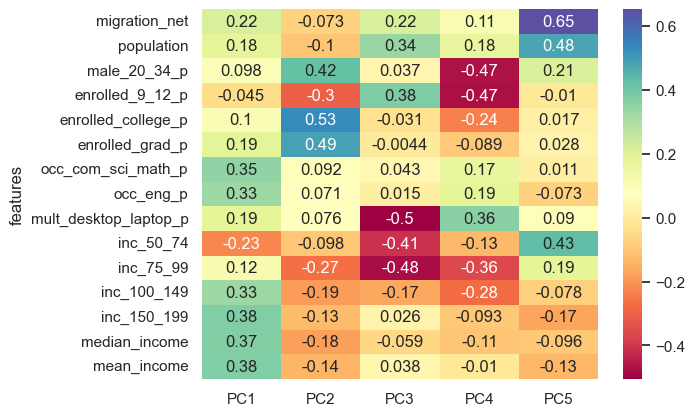

In [113]:
# Heatmap
pcx_heatmap = sns.heatmap(pcx_loadings_df, annot=True, cmap='Spectral')
plt.show()

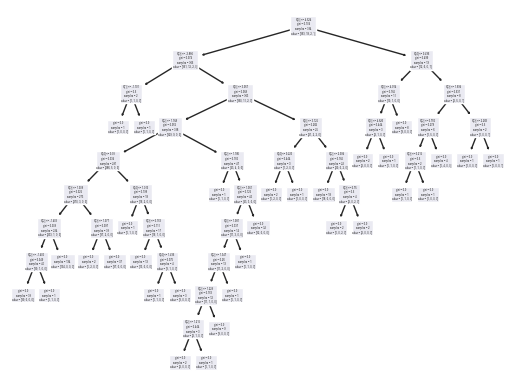

In [138]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()

classifier.fit(pcax_features, micro_targets_2019)

tree.plot_tree(classifier)
plt.show()

In [142]:
micro_test_values_2020 = stores_df_2020.iloc[:, 1:-1]

micro_test_values_2020_transformed = pcax.fit_transform(micro_test_values_2020)

predictions_2020 = classifier.predict(micro_test_values_2020_transformed)

print(predictions_2020, len(predictions_2020))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0] 384


In [143]:
predictions_2020_df = stores_df_2020.copy()

predictions_2020_df.insert(0, 'prediction', predictions_2020)

predictions_2020_df

,prediction,METRO,migration_net,population,male_20_34_p,enrolled_9_12_p,enrolled_college_p,enrolled_grad_p,occ_com_sci_math_p,occ_eng_p,mult_desktop_laptop_p,inc_50_74,inc_75_99,inc_100_149,inc_150_199,median_income,mean_income
0,0,"Abilene, TX Metro Area",2134,171354,13.10,5.09,6.30,1.06,0.49,0.65,26.05,19.0,13.2,13.8,5.0,54857,72694
1,0,"Akron, OH Metro Area",514,703286,10.14,4.75,5.98,1.43,0.88,1.69,31.75,18.1,13.9,14.4,5.6,59313,80601
2,0,"Albany-Lebanon, OR Metro Area",33,127216,9.68,4.98,3.49,0.89,0.56,0.81,29.89,20.6,14.1,15.9,4.4,59547,71370
3,0,"Albany-Schenectady-Troy, NY Metro Area",2810,880766,10.40,4.73,6.44,1.65,1.54,2.30,32.90,17.0,13.5,18.7,8.5,72810,93501
4,0,"Albany, GA Metro Area",97,147431,9.84,5.75,6.98,1.13,0.56,0.32,25.85,18.3,10.9,11.7,3.1,46323,61353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0,"Yakima, WA Metro Area",430,250649,10.29,6.49,3.49,0.71,0.25,0.34,22.87,20.9,13.4,12.6,4.5,54917,71505
380,0,"York-Hanover, PA Metro Area",1522,447628,9.21,5.09,3.76,0.89,0.81,1.20,30.00,19.9,15.5,18.1,7.1,68940,84662
381,0,"Youngstown-Warren-Boardman, OH-PA Metro Area",-2202,538115,9.05,4.96,4.12,0.73,0.62,1.07,30.03,18.4,11.9,11.9,3.4,48020,64412
382,0,"Yuba City, CA Metro Area",655,173839,11.09,5.86,5.86,0.80,0.44,0.98,25.50,17.8,13.2,16.6,6.4,61655,80579
